## Analysis

Before proceeding further, we will link our notebook to google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


###Indexing

Considering that many of the columns of the initial dataset we were using are not meaningful to our analysis, we deciced to do the following:


*  Drop Irrelevant column from the health stats dataset
*  Choose only rows of stratification type "overall"

*  Merge health stats with spatial_data
*  Create one dataset for the variable exercise and one for the variable obesity





In [ ]:
import pandas as pd

# loading the datasets
health_stats_path = '/content/drive/MyDrive/Fall 2023/Applied Data Science/Project/health_stats.csv'
spatial_trends_path = '/content/drive/MyDrive/Fall 2023/Applied Data Science/Project/spatial_trends1.csv'

health_stats_df = pd.read_csv(health_stats_path)
spatial_trends_df = pd.read_csv(spatial_trends_path)

# filtering the 'health_stats_df' for rows where StratificationType is 'Overall'
filtered_health_stats_df = health_stats_df[health_stats_df['StratificationType'] == 'Overall']

# merging the two dataframes
merged_df = pd.merge(filtered_health_stats_df, spatial_trends_df, left_on=['Year', 'LocationDesc'], right_on=['year', 'geoName'])

# creating separate datasets for 'exercise' and 'obesity'
exercise_df = merged_df[merged_df['Variables'] == 'exercise']
obesity_df = merged_df[merged_df['Variables'] == 'obesity']

# dropping specified columns
columns_to_drop = ['Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size', 'Stratification', 'year']
exercise_df_dropped = exercise_df.drop(columns=columns_to_drop)
obesity_df_dropped = obesity_df.drop(columns=columns_to_drop)

exercise_dat = exercise_df_dropped
obesity_dat = obesity_df_dropped


### Simple Statistics

Although we are aware of the contents of the dataset, refreshing our minds on some of the statistics (mean etc) is a must. For this reason, we use the .describe function() on both the obesity and the exercise datasets.

It is to be noted that makes to sense to have those statistics for the ID and Year column. As such they are excluced

In [ ]:
obesity_dat.iloc[:,2:].describe()

,NIH,abdominal,aerobic exercise,apnea,best workout,bike helmet,bike laws,bike locks,bike repair,bike sale,...,trainer,type 2,type 2 diabetes,unhealthy,visceral,weighing,weight loss,wellness,workout,yoga
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,...,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,9.287958,75.634817,44.503927,72.013089,66.356021,48.043194,27.370419,21.782723,41.151832,52.903141,...,82.527487,68.054974,63.243455,64.948953,59.164921,54.917539,74.015707,38.497382,83.252618,53.210733
std,13.897049,11.050054,24.053321,16.570904,21.060643,19.968113,30.795018,25.792395,22.221994,17.313955,...,9.928078,14.968192,17.105437,19.719495,23.606573,19.828617,11.298396,13.949121,9.457239,18.259132
min,2.000000,33.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,...,42.000000,13.000000,20.000000,0.000000,0.000000,0.000000,35.000000,10.000000,39.000000,12.000000
25%,5.000000,68.750000,31.000000,63.000000,54.750000,36.000000,0.000000,0.000000,28.000000,43.000000,...,78.000000,62.000000,53.000000,53.000000,46.000000,38.000000,66.750000,31.000000,78.000000,40.000000
50%,6.000000,77.000000,47.000000,76.000000,72.000000,46.000000,13.500000,15.000000,40.000000,52.000000,...,84.000000,70.000000,65.000000,69.000000,65.000000,57.000000,73.000000,36.000000,84.000000,51.000000
75%,8.000000,83.000000,58.000000,84.000000,81.000000,58.000000,52.000000,39.000000,55.000000,62.000000,...,89.000000,77.000000,74.250000,79.000000,76.000000,69.000000,81.000000,41.000000,89.000000,65.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Data Consistency:
Each column has 764 entries.

Statistical Data:
Provides mean, standard deviation, min, 25%, 50%, 75%, and max values for each column.


In [ ]:
exercise_dat.iloc[:,2:].describe()

,NIH,abdominal,aerobic exercise,apnea,best workout,bike helmet,bike laws,bike locks,bike repair,bike sale,...,trainer,type 2,type 2 diabetes,unhealthy,visceral,weighing,weight loss,wellness,workout,yoga
count,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,...,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000,764.000000
mean,9.287958,75.634817,44.503927,72.013089,66.356021,48.043194,27.370419,21.782723,41.151832,52.903141,...,82.527487,68.054974,63.243455,64.948953,59.164921,54.917539,74.015707,38.497382,83.252618,53.210733
std,13.897049,11.050054,24.053321,16.570904,21.060643,19.968113,30.795018,25.792395,22.221994,17.313955,...,9.928078,14.968192,17.105437,19.719495,23.606573,19.828617,11.298396,13.949121,9.457239,18.259132
min,2.000000,33.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,...,42.000000,13.000000,20.000000,0.000000,0.000000,0.000000,35.000000,10.000000,39.000000,12.000000
25%,5.000000,68.750000,31.000000,63.000000,54.750000,36.000000,0.000000,0.000000,28.000000,43.000000,...,78.000000,62.000000,53.000000,53.000000,46.000000,38.000000,66.750000,31.000000,78.000000,40.000000
50%,6.000000,77.000000,47.000000,76.000000,72.000000,46.000000,13.500000,15.000000,40.000000,52.000000,...,84.000000,70.000000,65.000000,69.000000,65.000000,57.000000,73.000000,36.000000,84.000000,51.000000
75%,8.000000,83.000000,58.000000,84.000000,81.000000,58.000000,52.000000,39.000000,55.000000,62.000000,...,89.000000,77.000000,74.250000,79.000000,76.000000,69.000000,81.000000,41.000000,89.000000,65.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000






Data Consistency: Similar to the first table, each column has 764 entries.

Statistical Data: It also provides mean, standard deviation, min, 25%, 50%, 75%, and max values for each column.


### Sorting

We would now like to sort the obesity dataset in descending order of obesity rates.

In [ ]:
obesity_dat.sort_values(by='Data_Value', ascending= False).head()

,ID,Year,LocationAbbr,LocationDesc,Data_Value,StratificationType,Variables,geoName,NIH,abdominal,...,trainer,type 2,type 2 diabetes,unhealthy,visceral,weighing,weight loss,wellness,workout,yoga
1523,3360509.0,2018.0,WV,West Virginia,39.5,Overall,obesity,West Virginia,8,100,...,75,78,99,47,74,74,97,32,78,32
1475,3262246.0,2018.0,MS,Mississippi,39.5,Overall,obesity,Mississippi,5,92,...,80,100,97,82,81,87,100,26,84,25
1421,3141753.0,2017.0,WV,West Virginia,38.1,Overall,obesity,West Virginia,7,100,...,81,82,82,71,100,77,98,31,82,34
1319,2902842.0,2016.0,WV,West Virginia,37.7,Overall,obesity,West Virginia,6,100,...,87,90,94,67,78,80,95,31,85,35
1271,2800492.0,2016.0,MS,Mississippi,37.3,Overall,obesity,Mississippi,4,83,...,88,100,84,81,85,98,100,28,93,26


With the obesity dataset now sorted in descending order, we thought it might be helpful for comparison purposes to view the exercise dataset in descending order of exercise rates as well.

In [ ]:
exercise_dat.sort_values(by='Data_Value', ascending = False).head()

,ID,Year,LocationAbbr,LocationDesc,Data_Value,StratificationType,Variables,NIH,abdominal,aerobic exercise,...,trainer,type 2,type 2 diabetes,unhealthy,visceral,weighing,weight loss,wellness,workout,yoga
124,571044.0,2006,MN,Minnesota,85.8,Overall,exercise,7,60,43,...,78,73,37,54,23,54,75,52,67,42
655,2886170.0,2016,UT,Utah,84.3,Overall,exercise,6,67,100,...,98,83,72,83,79,78,64,33,95,55
616,2720181.0,2016,CO,Colorado,84.2,Overall,exercise,6,66,48,...,91,71,66,74,66,65,65,46,90,81
277,190051.0,2009,MN,Minnesota,84.2,Overall,exercise,7,75,37,...,81,81,71,60,54,38,69,49,73,62
22,812363.0,2004,MN,Minnesota,84.1,Overall,exercise,9,63,29,...,64,31,35,36,25,30,67,46,67,53


###Plotting

In conducting statistical analysis, it is often tempting to rely solely on numerical summaries and statistical measures to understand a dataset. However, the significance of visual representation in data analysis should not be underestimated. To illustrate this point effectively, let us consider the health statistics dataset under our current examination. This dataset is composed of multiple entries, each representing state-level prevalence rates for obesity and exercise over a span of 15 years, from 2004 to 2018.
The inclusion of visualizations in our analysis of this dataset will not only aid in identifying underlying patterns and trends but also enhance our understanding of the complex relationships between exercise and obesity across different states and over time.

####Trends Over Time

Given that our research question aims to uncover whether pro-health/non-pro-health searches can be used to predict exercise/obesity rates at the state level, we thought it would be a good idea to look at the exercise and obesity trends at the state level over time.

For this reason, we produced three diagrams namely:


*   Exercise Trends Over Time per state
*   Obesity Trends Over Time per State
*   Mean Exercise and Obesity Trends at the National level




<ipython-input-53-c25db50fbbb0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_exercise_data['Data_Value'] = pd.to_numeric(overall_exercise_data['Data_Value'])


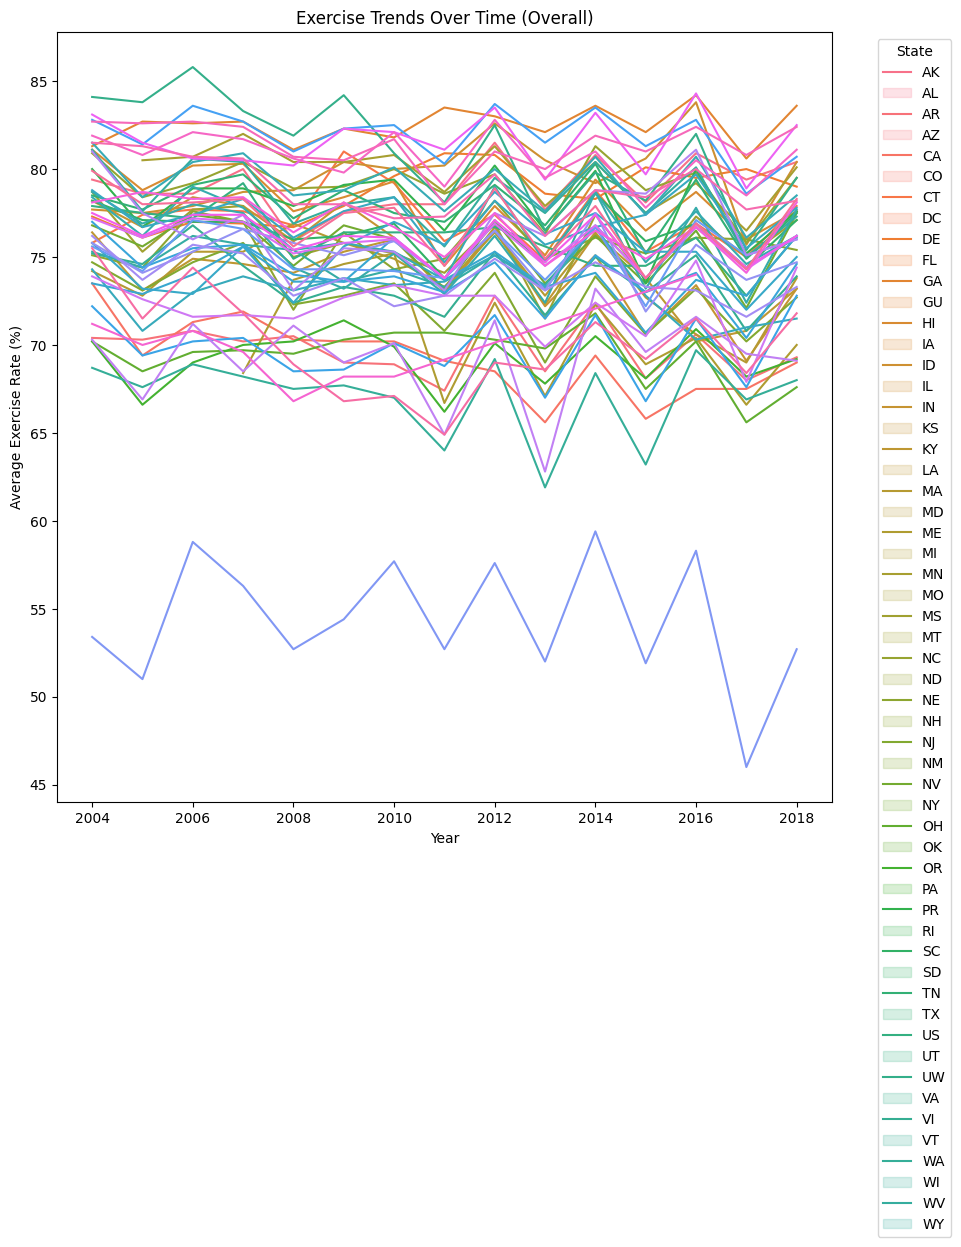

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  loading the dataset
health_data = pd.read_csv('/content/drive/MyDrive/Fall 2023/Applied Data Science/Project/Milestone2/health_stats.csv')

# filtering for 'Overall' StratificationType and focusing on exercise data
overall_exercise_data = health_data[(health_data['StratificationType'] == 'Overall') & (health_data['Variables'] == 'exercise')]

# ensuring 'Data_Value' is numeric
overall_exercise_data['Data_Value'] = pd.to_numeric(overall_exercise_data['Data_Value'])

# grouping by year and state, then calculate the mean exercise rate
exercise_trends = overall_exercise_data.groupby(['Year', 'LocationAbbr'])['Data_Value'].mean().unstack()

# plotting Exercise Trends Over Time for all states
plt.figure(figsize=(10, 10))
sns.lineplot(data=exercise_trends, dashes=False, legend=False)
plt.title('Exercise Trends Over Time (Overall)')
plt.xlabel('Year')
plt.ylabel('Average Exercise Rate (%)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', labels=exercise_trends.columns)
plt.show()







<ipython-input-57-86f4e01f8976>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_obesity_data['Data_Value'] = pd.to_numeric(overall_obesity_data['Data_Value'])


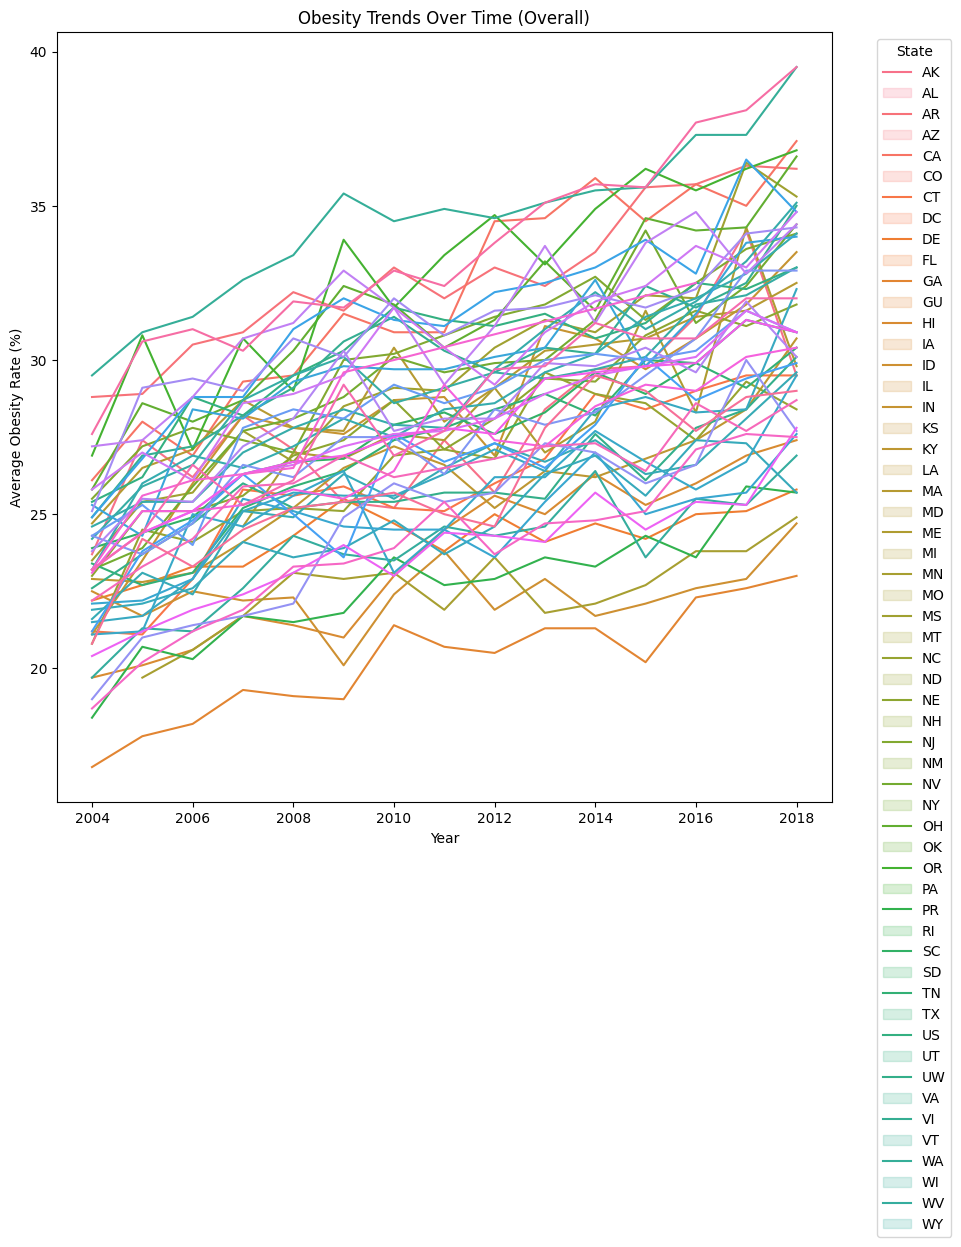

In [ ]:

# filtering for 'Overall' StratificationType and focusing on obesity data
overall_obesity_data = health_data[(health_data['StratificationType'] == 'Overall') & (health_data['Variables'] == 'obesity')]

# ensuring 'Data_Value' is numeric
overall_obesity_data['Data_Value'] = pd.to_numeric(overall_obesity_data['Data_Value'])

# grouping by year and state, then calculate the mean obesity rate
obesity_trends = overall_obesity_data.groupby(['Year', 'LocationAbbr'])['Data_Value'].mean().unstack()

# plotting Obesity Trends Over Time for all states
plt.figure(figsize=(10, 10))
sns.lineplot(data=obesity_trends, dashes=False, legend=False)
plt.title('Obesity Trends Over Time (Overall)')
plt.xlabel('Year')
plt.ylabel('Average Obesity Rate (%)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left', labels=obesity_trends.columns)
plt.show()


Considering the complexity and intertwining of the individual data lines, it was challenging for us to derive any significant insights. As a result, we decided to adopt a more simplified method. This involved graphing the average exercise/obesity rates in the US for each year over a 15-year period.

<ipython-input-6-a18f4269f0cb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obesity_data['Data_Value'] = pd.to_numeric(obesity_data['Data_Value'])
<ipython-input-6-a18f4269f0cb>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exercise_data['Data_Value'] = pd.to_numeric(exercise_data['Data_Value'])


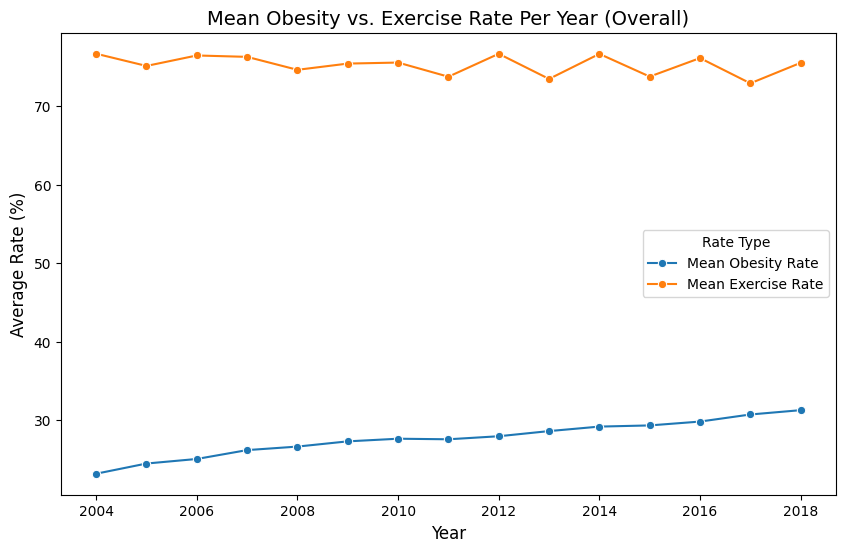

In [ ]:

# filtering data for 'Overall' StratificationType
overall_health_data = health_data[health_data['StratificationType'] == 'Overall']

# separating obesity and exercise data
obesity_data = overall_health_data[overall_health_data['Variables'] == 'obesity']
exercise_data = overall_health_data[overall_health_data['Variables'] == 'exercise']

# converting 'Data_Value' to numeric in both datasets
obesity_data['Data_Value'] = pd.to_numeric(obesity_data['Data_Value'])
exercise_data['Data_Value'] = pd.to_numeric(exercise_data['Data_Value'])

# calculating the mean obesity and exercise rate per year across all states
mean_obesity_per_year = obesity_data.groupby('Year')['Data_Value'].mean()
mean_exercise_per_year = exercise_data.groupby('Year')['Data_Value'].mean()

# plotting the average rates across time
plt.figure(figsize=(10, 6))

sns.lineplot(data=mean_obesity_per_year, label='Mean Obesity Rate', marker='o')
sns.lineplot(data=mean_exercise_per_year, label='Mean Exercise Rate', marker='o')

plt.title('Mean Obesity vs. Exercise Rate Per Year (Overall)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rate (%)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Rate Type')

plt.show()


As we can observe, exercise rates appear to have remained more or less constant over the years, while obesity rates increased overtime.

While these new insights do not explicitly contribute to our research question, we believe this information can play an important role down the lane, as we proceed with our analysis.

Just as we analyzed trends for exercise and obesity rates, we decided to do same for a sample of pro-health and non-pro-health words

<ipython-input-65-3cecac705554>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_search_per_year = data.groupby('year').mean()


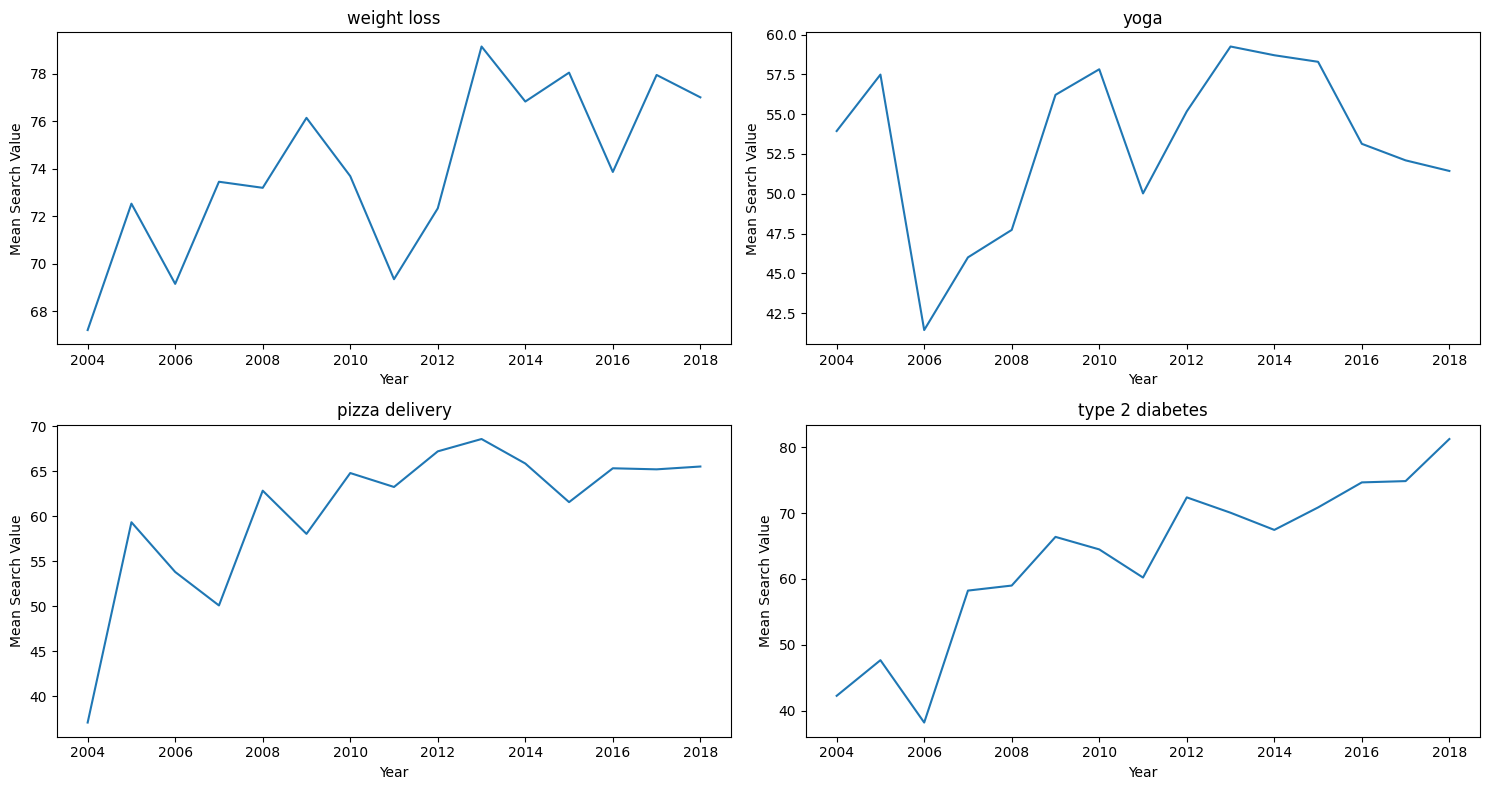

In [ ]:




dataset_path = '/content/drive/MyDrive/Fall 2023/Applied Data Science/Project/filtered_spatial_trends.csv'

# loading the dataset
data = pd.read_csv(dataset_path)

# calculating mean search values per year
mean_search_per_year = data.groupby('year').mean()

# sampling selected words for demonstration
selected_words = ['weight loss', 'yoga', 'pizza delivery', 'type 2 diabetes']

# creating a grid for the small multiples
num_plots = len(selected_words)
num_rows = num_plots // 2 if num_plots % 2 == 0 else (num_plots // 2) + 1

fig, axs = plt.subplots(num_rows, 2, figsize=(15, num_rows * 4))
 # flattening the axes array for easy iteration
axs = axs.flatten()

# plotting each selected word in its own subplot
for i, word in enumerate(selected_words):
    if i < len(axs):
        sns.lineplot(x=mean_search_per_year.index, y=mean_search_per_year[word], ax=axs[i])
        axs[i].set_title(word)
        axs[i].set_xlabel('Year')
        axs[i].set_ylabel('Mean Search Value')

# adjusting layout
plt.tight_layout()
plt.show()


###Correlation Analysis

####Relationship between Exercise and Obesity

> Indented block



Coming to some analysis that is more directly linked to our research question, we decided to investigate the relationship between exercise rates and obesity levels.

The underlying hypothesis posits that an increase in pro-health searches correlates with lower obesity rates and higher exercise rates at the state level. Consequently, if this hypothesis holds true, one would anticipate observing a negative correlation between obesity and exercise rates. The primary objective of the forthcoming analysis is to investigate this hypothesis by examining the data and demonstrating this anticipated negative correlation through our visualizations

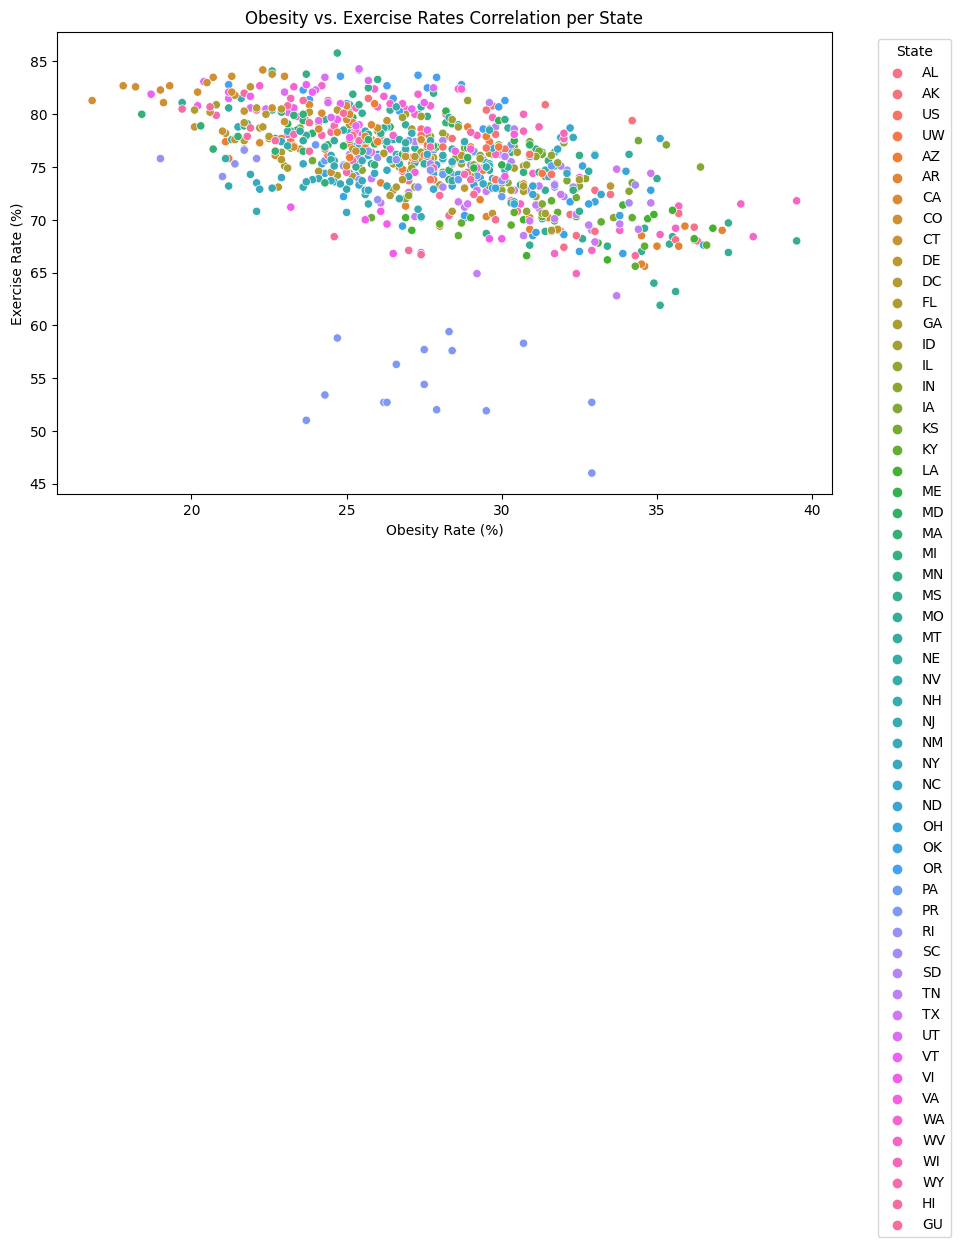

In [ ]:
# merging obesity and exercise data for correlation analysis
merged_data = pd.merge(obesity_data, exercise_data, on=["Year", "LocationAbbr"], suffixes=('_obesity', '_exercise'))

# creating a scatter plot to examine the relationship between obesity rates and exercise rates
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Data_Value_obesity', y='Data_Value_exercise', data=merged_data, hue='LocationAbbr')
plt.title('Obesity vs. Exercise Rates Correlation per State')
plt.xlabel('Obesity Rate (%)')
plt.ylabel('Exercise Rate (%)')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


As shown above, the relationship we were anticipating is actually true. Higher exercise rates would usually be associated with lower obesity rates.

Given the apparently strong negative correlation, we decided to fit a line of best fit to see how well the data could be modelled by a linear regression. This is what we got:

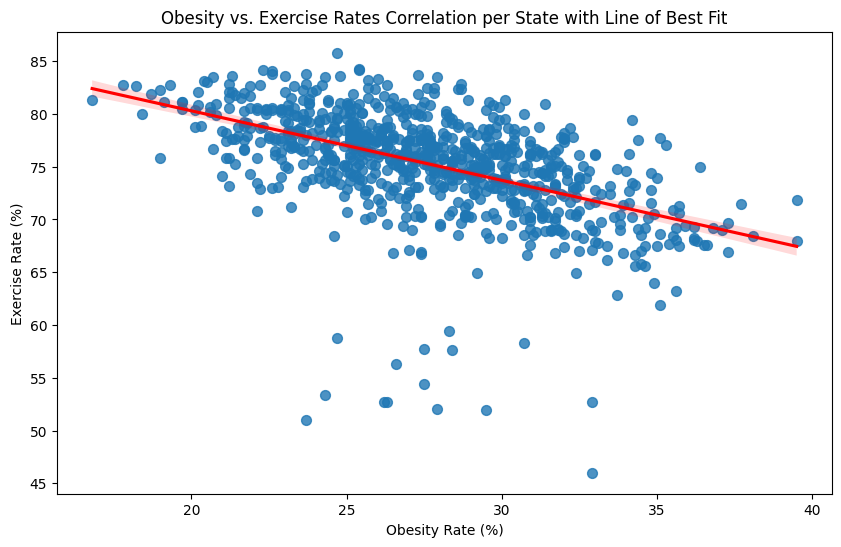

In [ ]:
# Creating a scatter plot with a regression line to examine the relationship between obesity rates and exercise rates
plt.figure(figsize=(10, 6))

# Using regplot for scatter plot with a line of best fit
sns.regplot(x='Data_Value_obesity', y='Data_Value_exercise', data=merged_data, scatter_kws={'s': 50}, line_kws={"color": "red"})

plt.title('Obesity vs. Exercise Rates Correlation per State with Line of Best Fit')
plt.xlabel('Obesity Rate (%)')
plt.ylabel('Exercise Rate (%)')
plt.show()

As it can be seen, the distribution can be modelled fairly well with a linear regression model. While this is not completely relevant to milestone 2, given that we are still at the explanatory stage, we thought it would be an interesting relationship to investigate.

####Relationship between some pro-health and some non-pro-health words

Does more pro-health searches mean less of non-pro-health searches? While this is not the question that we are investigating, we thought investigating the relationship between pro-health and non-pro-health searches might unveil interesting insights that can later contribute to our analysis.

For instance, if there is a strong, positive correlation between some pro-health and some non-pro-health words, a high search intensity of that specific pro-health word would mean a high-search-intensity of the non-pro-health word it is correlated with. What does this imply for us?


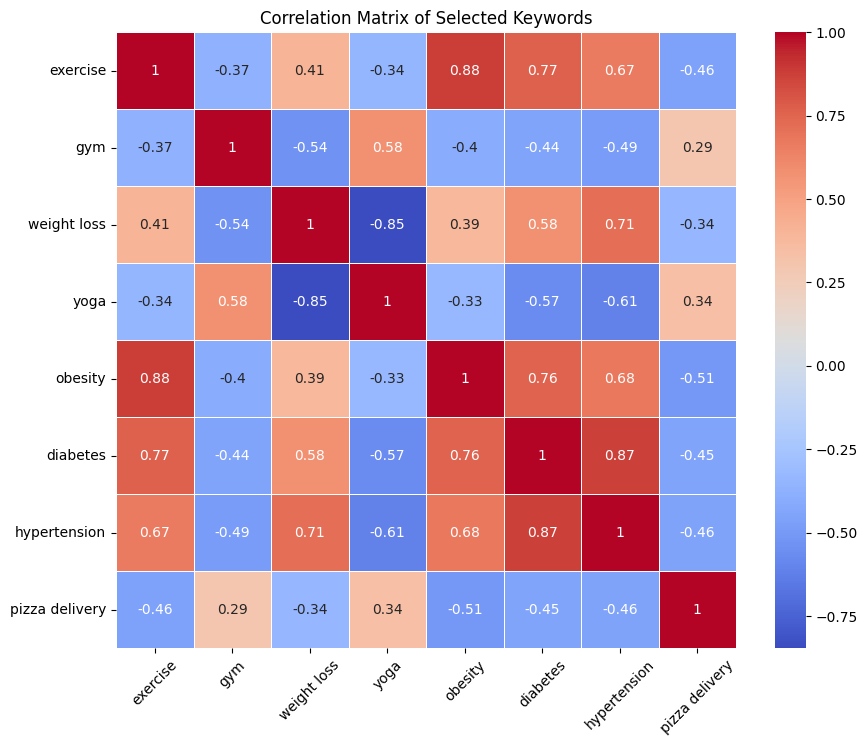

In [ ]:
file_path = '/content/drive/MyDrive/Fall 2023/Applied Data Science/Project/filtered_spatial_trends.csv'
df = pd.read_csv(file_path)
selected_keywords = [
    'exercise', 'gym', 'weight loss', 'yoga',
    'obesity', 'diabetes', 'hypertension', 'pizza delivery'
]
matrix_df = df[['geoName', 'year'] + selected_keywords]
matrix_data = matrix_df.groupby('geoName')[selected_keywords].mean()

corr_matrix = matrix_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Selected Keywords')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

obesity_dat = pd.read_csv("/content/drive/MyDrive/Fall 2023/Applied Data Science/Project/modified_obesity_data.csv")
exercise_dat = pd.read_csv("/content/drive/MyDrive/Fall 2023/Applied Data Science/Project/modified_exercise_data.csv")


search_columns = obesity_dat.columns[8:]
relevant_columns = ['Data_Value'] + list(search_columns)


obesity_dat[relevant_columns] = obesity_dat[relevant_columns].apply(pd.to_numeric, errors='coerce')
obesity_dat.dropna(subset=relevant_columns, inplace=True)


corr_matrix = obesity_dat[relevant_columns].corr(method='spearman')


print(corr_matrix)

# Hypothesis Testing

### Hypothesis Re-Evaluation

We tweaked our hypothesis slightly from our last attempt at trying to make sense of and analyze the health stats dataset. As seen in Milestone 1 and the above analysis in Milestone 2, health stats is a very broad and expansive dataset, with a host of variables and data types. We came to the conclusion that we would need to zoom in on the data, or in other words, concentrate our focus into looking at a specific thing rather than dwelling too much on using as much of the data as possible.

With that in mind, we chose one of the first things that came to our mind when we were exploring the dataset the first time around. We decided to test whether -

*\"Higher search intensities for pro-health words are associated with better health outcomes, as indicated by lower average BMIs and higher exercise rates.\"*




### Choosing Regression Analysis

Now to test this hypothesis, we decided to use a good-old-friend that helped us in previous stats classes - Regressions!

A multi-variable regression, we decided, would allow us to model how different pro-health search intensities predict BMI and exercise rates. Ultimately, we wanted to explore the relationship between health-oriented online search behavior and physical health outcomes. A multiple linear regression analysis could help us assess how search intensities for various health-related terms (as a proxy for health awareness or interest) correlate with two key health indicators: Body Mass Index (BMI) and exercise rates.

### Independent and Dependent Variables

The independent variables in this analysis are the search intensities for a range of pro-health words, selected based on their relevance to health and fitness. These terms include 'dietary', 'ejercicios', 'exercise', 'exercises', 'fitbit', 'fitness gym', 'fitness', 'gym near me', 'gym', 'healthy', 'how to exercise', 'how to lose weight', 'insanity workout', 'jogging', 'my fitness pal', 'nutrition', 'pre workout', 'quinoa gluten free', 't25 schedule', 'trainer', 'weighing', 'weight loss', 'wellness', and 'yoga'. These terms were chosen to represent a broad spectrum of health-related interests, ranging from general wellness and nutrition to specific fitness activities and weight loss strategies. The rationale is that the frequency of searches for these terms might reflect the public's engagement with health and fitness topics, which could, in turn, influence their physical health behaviors and outcomes.

For our dependent variables we used the exercise-response rate and the BMIs. BMIs and exercise rates made sense to us as dependent variables as they are generally accepted indicators of physical health (at least to us they are!).

It's important to mention that our data aggregated at the state level, where each observation represents the average search intensity for these terms and the corresponding average BMI and exercise rate in a given state. By applying multiple linear regression, we are sort of trying to quantify the strength and direction of the relationships between online search behaviors and physical health outcomes.


For this code, we needed to use the statsmodels library and the numpy library. We also read the relevant documentations to produce the regression.

In [ ]:
import numpy as np
import statsmodels.api as sm

# Load the aggregated data
data_final_path = '/content/drive/MyDrive/Fall 2023/Applied Data Science/Project/data_final.csv'
data_final = pd.read_csv(data_final_path)

# Define the list of pro-health words
pro_health_words = ['dietary', 'ejercicios', 'exercise', 'exercises', 'fitbit', 'fitness gym', 'fitness',
                    'gym near me', 'gym', 'healthy', 'how to exercise', 'how to lose weight', 'insanity workout',
                    'jogging', 'my fitness pal', 'nutrition', 'pre workout', 'quinoa gluten free', 't25 schedule',
                    'trainer', 'weighing', 'weight loss', 'wellness', 'yoga']

# Select only the relevant columns for the analysis
pro_health_data = data_final[pro_health_words + ['BMI', 'Exercise_Rate']]

# Prepare the independent and dependent variables
X = pro_health_data[pro_health_words]  # Independent variables
Y = pro_health_data[['BMI', 'Exercise_Rate']]  # Dependent variables

# Regression for BMI
X_bmi = sm.add_constant(X)  # Add a constant
model_bmi = sm.OLS(Y['BMI'], X_bmi).fit()  # Fit the model
bmi_summary = model_bmi.summary()  # Summary of the model

# Regression for Exercise Rate
X_exercise = sm.add_constant(X)  # Add a constant
model_exercise = sm.OLS(Y['Exercise_Rate'], X_exercise).fit()  # Fit the model
exercise_summary = model_exercise.summary()  # Summary of the model

# Print the summaries
print(bmi_summary)
print(exercise_summary)


                            OLS Regression Results                            
Dep. Variable:                    BMI   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     93.86
Date:                Mon, 13 Nov 2023   Prob (F-statistic):          9.66e-206
Time:                        23:04:02   Log-Likelihood:                -1606.3
No. Observations:                 764   AIC:                             3263.
Df Residuals:                     739   BIC:                             3379.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 28.9190      1

### Interpreting and Making Sense of the Analysis

Woah! That's a lot to interpret, but we started to break it down little by little.

**Exercise Rate Regression Analysis**

**R-squared**: The model explains 83.5% of the variance in Exercise Rate, indicating a strong relationship.

*Positive Coefficients*: **Terms like 'fitbit', 'gym', 'healthy', 'yoga', etc., show a positive relationship, which might mean higher search intensities for these terms are associated with higher exercise rates.**

*Negative Coefficients*: Few terms like 'how to lose weight' and 'weight loss' have negative coefficients, suggesting a more complex relationship where higher searches might relate to lower exercise rates, possibly reflecting a population more focused on diet or other weight loss methods than exercise.

**BMI Regression Analysis**

**R-squared:** The model explains 75.3% of the variance in BMI, which is a substantial amount.

**Negative Coefficients (indicating a decrease in BMI with higher search intensities):** 'exercise', 'fitness', 'weight loss', etc. This suggests that higher searches for these terms are associated with lower BMI.

**Positive Coefficients (indicating an increase in BMI with higher search intensities):** 'fitbit', 'gym near me', etc. This could indicate that in some contexts, higher interest in these terms might not translate directly to lower BMI, possibly due to other lifestyle factors.

**P value**: The small p-value of 9.66e-206 (significantly less than 0.05) indicate that the overall model is statistically significant.

Overall, the analysis suggests a significant relationship between online health-related search behaviors and health outcomes, albeit with nuances that warrant further investigation and consideration of additional contextual factors.

BUT, this DOES NOT mean we can establish causal relationships or conclude that these factors decisive. There might be a lot of confounders as well as possible interactions in the variable that we had not accounted for. Nevertheless, this can be a good jump-off point to delve deeper into search-behaviors and how they affect us.
